# Uber Basic Data Analysis using Python

This notebook contains a basic analysis through some visualizations of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:
- Data Loading and Preparation.
- Exploration and visualization of pickups from April to September 2014.
- Conclusion.

The dataset can be found on https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data.

## 1. Data Loading and Preparation

### 1.1 Loading Modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1.2 Loading Data

In [0]:
#Load the datasets

df_apr14=pd.read_csv("data/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("data/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("data/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("data/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("data/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("data/uber-raw-data-sep14.csv")

#Merge the dataframes into one

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

### 1.3 Data Preparation

In [0]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
Date/Time    object
Lat          float64
Lon          float64
Base         object
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [0]:
#Renaming the Date/Time Colomn
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.weekday_name
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [0]:
df.head()

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
Date_time    datetime64[ns]
Lat          float64
Lon          float64
Base         object
Month        object
Weekday      object
Day          int64
Hour         int64
Minute       int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 311.3+ MB


In [0]:
df.describe(include = 'all')

,Date_time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
count,4534327,4.534327e+06,4.534327e+06,4534327,4534327,4534327,4.534327e+06,4.534327e+06,4.534327e+06
unique,260093,NaN,NaN,5,6,7,NaN,NaN,NaN
top,2014-04-07 20:21:00,NaN,NaN,B02617,September,Thursday,NaN,NaN,NaN
freq,97,NaN,NaN,1458853,1028136,755145,NaN,NaN,NaN
first,2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-09-30 22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.073926e+01,-7.397302e+01,NaN,NaN,NaN,1.594337e+01,1.421831e+01,2.940071e+01
std,NaN,3.994991e-02,5.726670e-02,NaN,NaN,NaN,8.744902e+00,5.958759e+00,1.732238e+01
min,NaN,3.965690e+01,-7.492900e+01,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,4.072110e+01,-7.399650e+01,NaN,NaN,NaN,9.000000e+00,1.000000e+01,1.400000e+01


## 2 Exploration and Visualization

Through our exploration we are going to visualize and analyse:
- The number of trips by hour
- The number of trips by month
- The number of trips by weekday
- The number of trips by day


- The number of trips by hour and month
- The number of trips by weekday and hour
- The number of trips by weekday and month



### 2.1 Trips by hour

In [0]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


#### Plotting the results

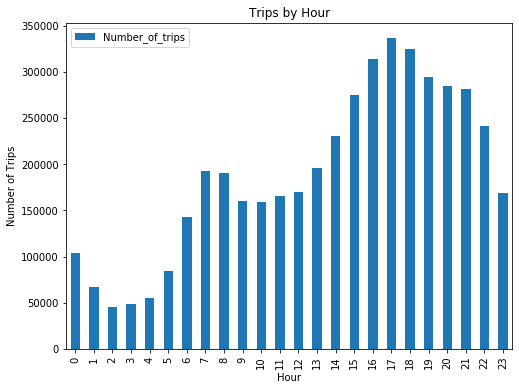

In [0]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

#### Analysing the results

In [0]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))


The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home. 

We can say that the majority of Uber's clients are workers.

### 2.2 Trips by month

In [0]:
#Grouping by Month 
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


#### Plotting the results

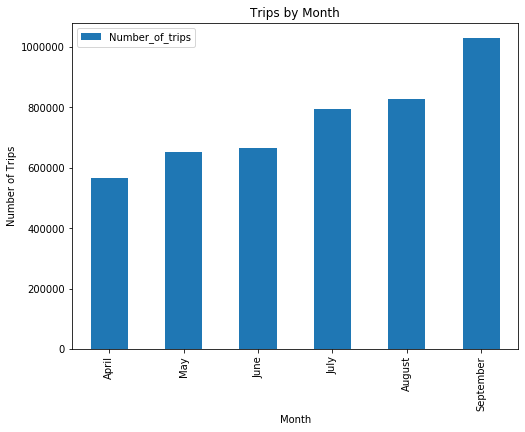

In [0]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

#### Analysing the results

We observe that the number of trips increases each month, with a peak increase between August and September.

In [0]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))


The ratio of the increase from August to September is 24.0 %.


From our results we can say that from April to September 2014, Uber was in a continuous improvement process.


### 2.3 Trips by weekday

In [0]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


#### Plotting the results

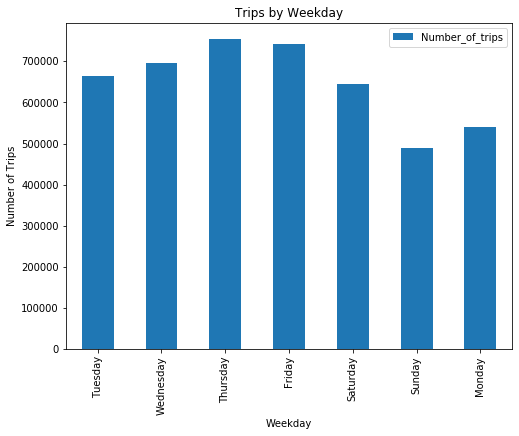

In [0]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

#### Analysing the results

In [0]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))


The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [0]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


As the ratio between workdays and weekends only 19.6%, and because of the low number of trips on Monday, it cannot be said that people use Uber on workdays more than on weekends.

We need to investigate more to find out why the number of trips on mondays is as low.

### 2.4 Trips by day

In [0]:
#Grouping by Day
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

,Number_of_trips
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


#### Plotting the results

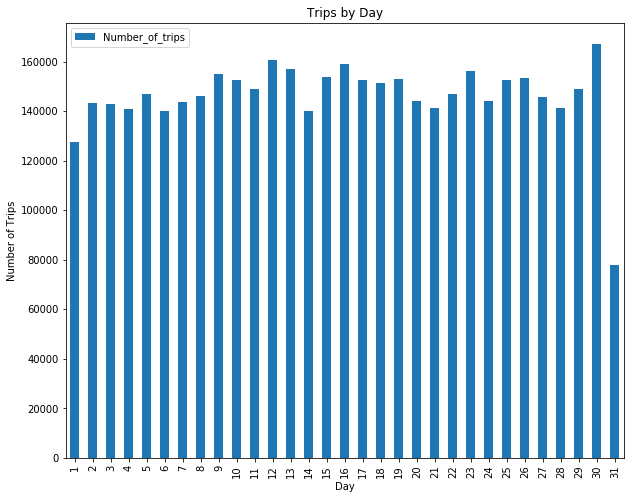

In [0]:
df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

#### Analysing the results

The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.

The day with the highest number of trips is the 30. There's not much variation from day to day.

### 2.5 Trips by hour and month

In [0]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [0]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [0]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [0]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


#### Plotting the results

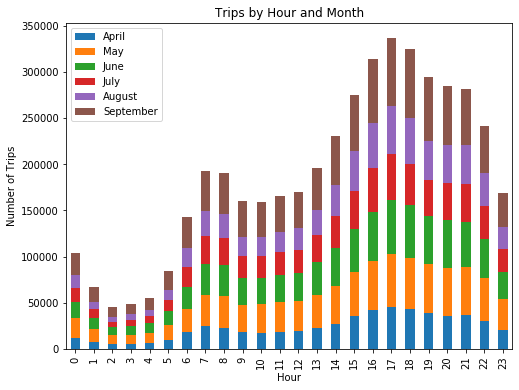

In [0]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

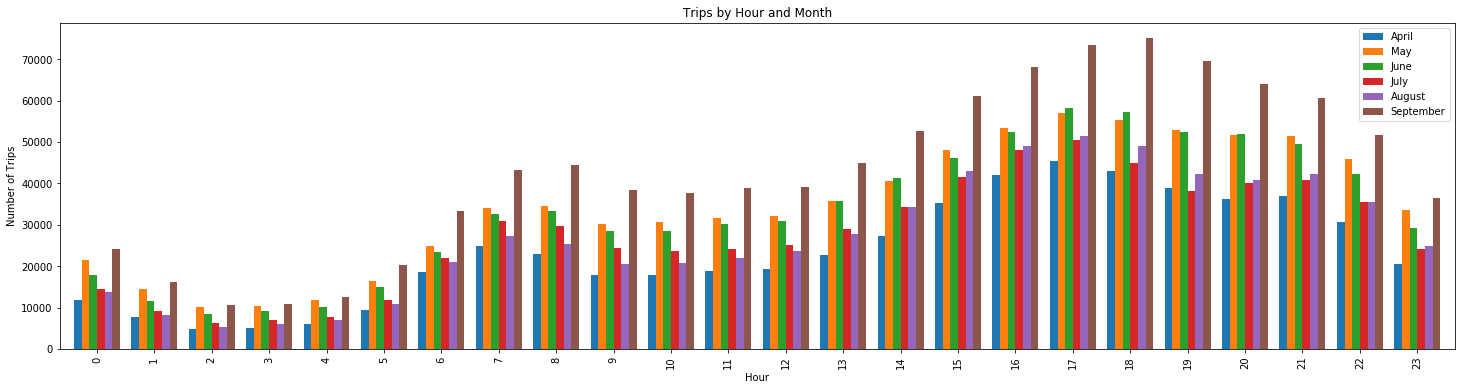

In [0]:
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

### 2.6 Trips by weekday and hour

In [0]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 

df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [0]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174


#### Plotting the results

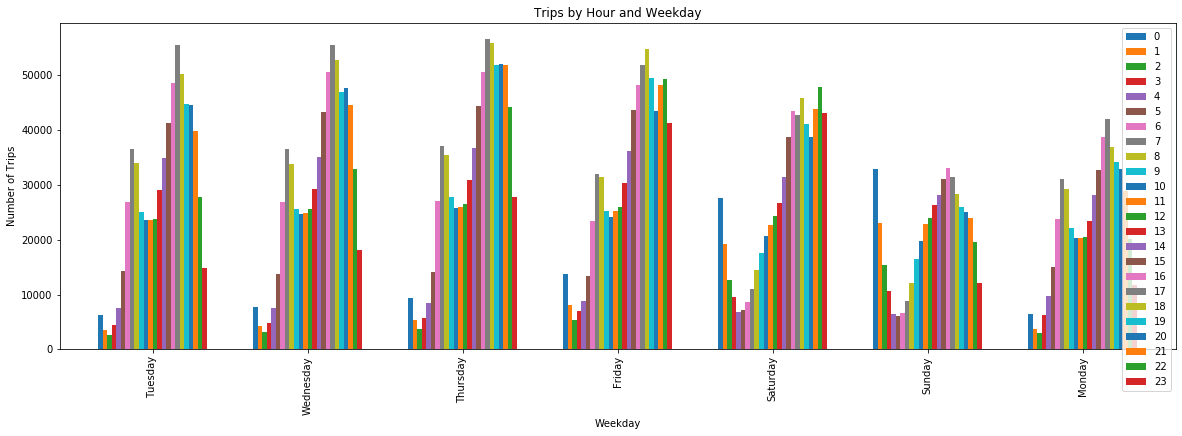

In [0]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

#### Analysing the results

We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. This pulse is not present on weekend days.

At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.

### 2.7 Trips by weekday and month


In [0]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [0]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,91185,108631,85067,90303,77218,51251,60861
May,128921,133991,102990,56168,63846,76662,89857
June,79656,94655,88134,99654,115325,105056,81364
July,137454,147717,148439,102735,90260,76327,93189
August,148674,132225,110246,91633,107124,115256,124117


#### Plotting the results

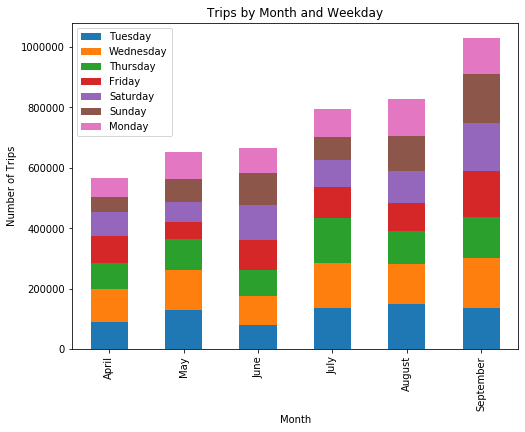

In [0]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

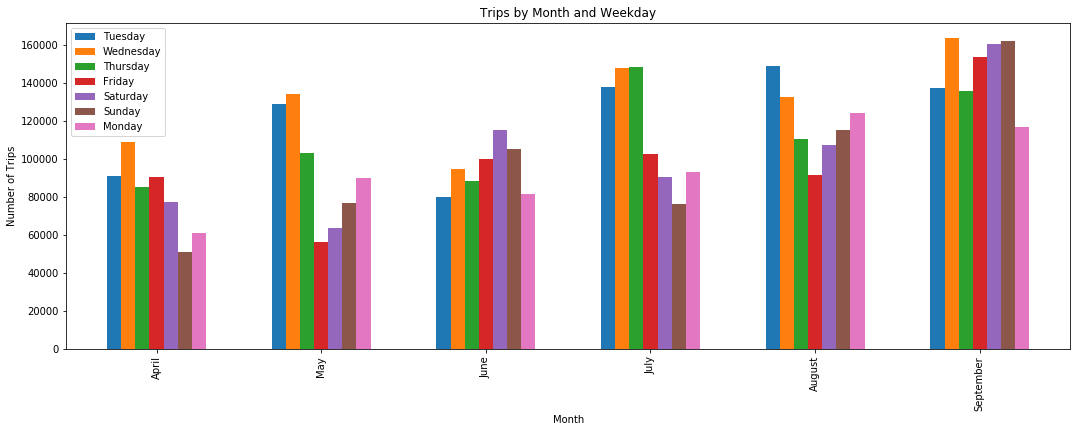

In [0]:
df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

# 3. Conclusion

Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:
- The peak demand hour 17:00.
- The main customer category are workers.
- An indicator of Uber's improvement from April to September.
- People tend to use Uber to go to work around 7:00 and 8:00 on working days.
- People tend to use Uber late at night (around midnight) during weekends.
- We should investigate why people don't use uber on Mondays as much as they do on other working days.

We plan to use more adapted tools in the future, such as heatmaps and machine learning algorithms in order to extract more insights.

#### Created by MEBREK Brahim